In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = sns.load_dataset(name = 'iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Task 1
С помощью k-средних кластеризуйте датасет ирисов

Text(0.5, 1.0, 'распределение по видам')

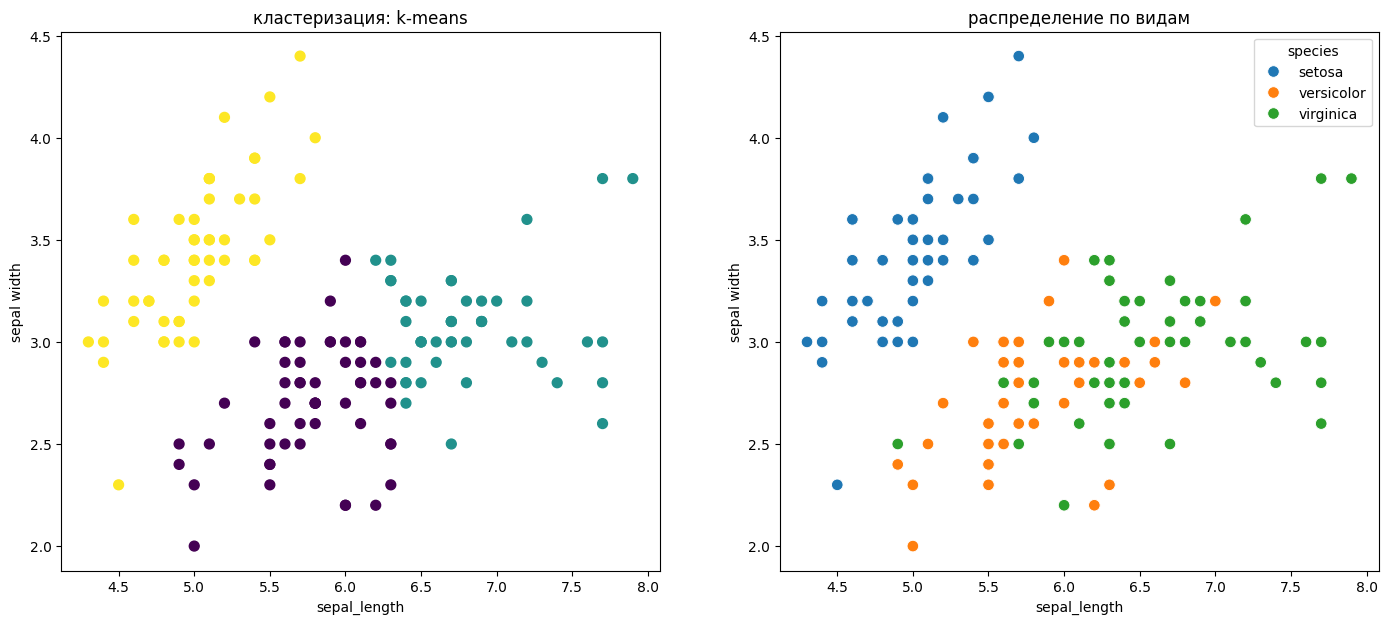

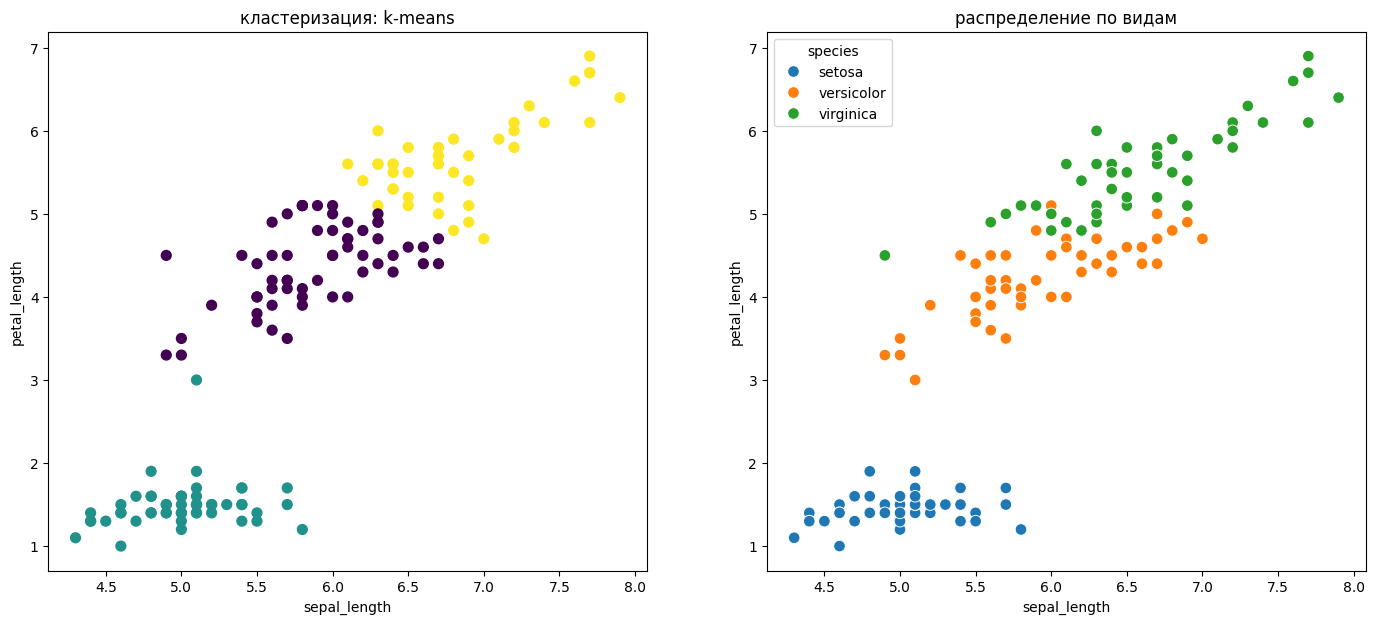

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (17,7))
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['sepal_length', 'sepal_width']])

ax[0].scatter(df.loc[:,'sepal_length'], df.loc[:, 'sepal_width'], c=kmeans.labels_, s=50)
ax[0].set_xlabel('sepal_length')
ax[0].set_ylabel('sepal width')
ax[0].set_title('кластеризация: k-means')
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax[1], s=70)
ax[1].set_xlabel('sepal_length')
ax[1].set_ylabel('sepal width')
ax[1].set_title('распределение по видам')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (17,7))
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['sepal_length', 'petal_length']])

ax[0].scatter(df.loc[:,'sepal_length'], df.loc[:, 'petal_length'], c=kmeans.labels_, s=50)
ax[0].set_xlabel('sepal_length')
ax[0].set_ylabel('petal_length')
ax[0].set_title('кластеризация: k-means')
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', ax=ax[1], s=70)
ax[1].set_xlabel('sepal_length')
ax[1].set_ylabel('petal_length')
ax[1].set_title('распределение по видам')

# Task 2
C помощью DBSCAN кластеризуйте датасет ирисов

Estimated number of clusters: 3
Estimated number of noise points: 9
Estimated number of clusters: 3
Estimated number of noise points: 9


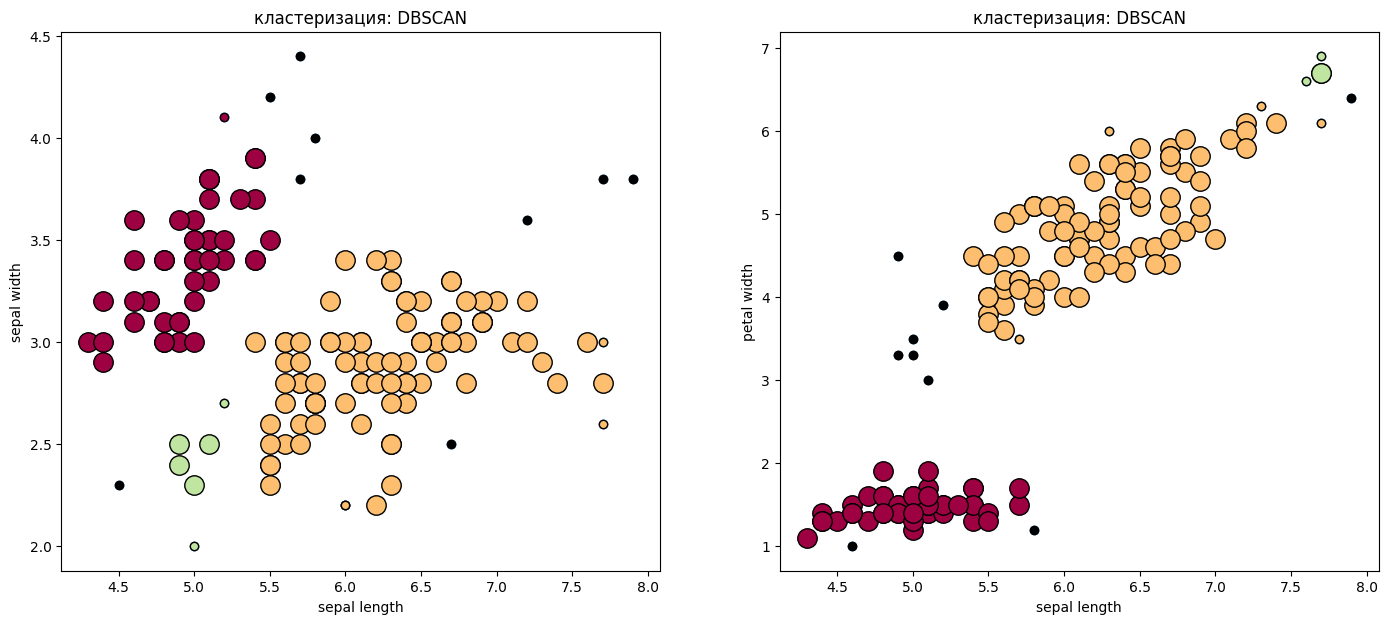

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (17,7))
for i in (0,1):
    ax[i].set_xlabel('sepal length')
    ax[i].set_title('кластеризация: DBSCAN')

ax[0].set_ylabel('sepal width')
ax[1].set_ylabel('petal width')
#FIRST PART
dens_pred = DBSCAN(eps=0.3, min_samples=4).fit(df[['sepal_length', 'sepal_width']])
ax[0].scatter(df['sepal_length'], df['sepal_width'])

core_samples_mask = np.zeros_like(dens_pred.labels_, dtype=bool)
core_samples_mask[dens_pred.core_sample_indices_] = True
labels = dens_pred.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    X = df[['sepal_length', 'sepal_width']].values
    xy = X[class_member_mask & core_samples_mask]
    ax[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#SECOND PART
dens_pred = DBSCAN(eps=0.3, min_samples=4).fit(df[['sepal_length', 'petal_length']])
ax[1].scatter(df['sepal_length'], df['petal_length'])

core_samples_mask = np.zeros_like(dens_pred.labels_, dtype=bool)
core_samples_mask[dens_pred.core_sample_indices_] = True
labels = dens_pred.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    X = df[['sepal_length', 'petal_length']].values
    xy = X[class_member_mask & core_samples_mask]
    ax[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Task 3
Опишите отличия


*Исходя из результатов кластеризации:*
1. Для kmeans нужно задавать число кластеров, dbscan находит сам число кластеров
2.  DBSCAN может определять шум в данных, в основе его работы объекты делятся на основные, пограничные и шумовые. В наших результатах видно, что алгоритм dbscan отнес некоторые данные к шумовым.
   
*Из общих соображений:* \
3. DBSCAN более устойчив к выбросам, чем kmeans. \
4. k-средних предполагает, что кластеры имеют сферическую форму и одинаковую дисперсию. DBSCAN более гибкий в этом плане, он способен обнаруживать кластеры произвольной формы. \
5. Для датасетов с разрозненной плотностью dbscan работает плохо, kmeans лучше